In [269]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


cardio = pd.read_csv('./data/cardio_train.csv', sep=';')

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


subset_1 = df.loc[0:10,[1,3]]

In [270]:
cardio.groupby('gender').gender.count()

gender
1    45530
2    24470
Name: gender, dtype: int64

Who is who? Let's plot parameters of both genders


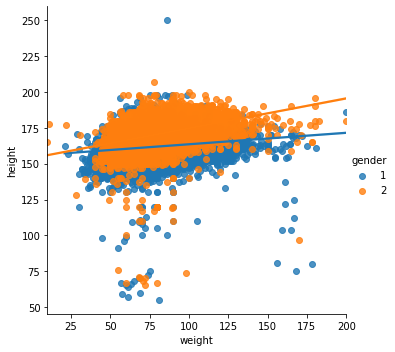

In [271]:
sns.lmplot(x='weight', y='height', hue='gender', data = cardio)
print('Who is who? Let\'s plot parameters of both genders')

In [272]:
# So we can see that 2 is a MAN, let's rename it
cardio.gender.replace(to_replace= 1, value = 'female',inplace = True)
cardio.gender.replace(to_replace= 2, value = 'male', inplace = True)

print('Changing gender factor levels to male\\female.')
cardio.head()

Changing gender factor levels to male\female.


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0


In [273]:
# Create new columns - BMI(body mass index)
cardio_bim = cardio.assign(BMI=cardio.weight / np.square(cardio.height/100))

print('Add new column - BMI(body mass index)')
cardio_bim.head()

Add new column - BMI(body mass index)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0,23.011177


So we have a significant amount of outliers,       in addition to this, it can be noted that the       outliers are more pronounced in a subgroup of female.


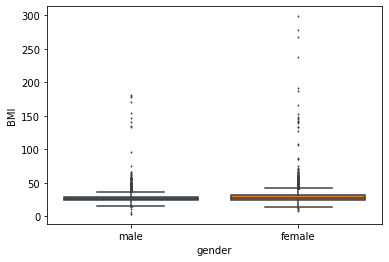

In [274]:
sns.boxplot(data = cardio_bim, x='gender', y='BMI', fliersize=1)
print('So we have a significant amount of outliers, \
      in addition to this, it can be noted that the \
      outliers are more pronounced in a subgroup of female.')

In [275]:
cardio_pressure = cardio_bim.query('ap_lo > ap_hi')
num, percent = [cardio.query('ap_lo > ap_hi').shape[0], str(round(cardio.query('ap_lo > ap_hi').shape[0]/cardio.shape[0]*100,2))+'%']
print(f'So we have {num} obseravtions of people who have diastolic pressure higher than systolic (of course these are mistakes). It\'s {percent} of all observations.')

So we have 1234 obseravtions of people who have diastolic pressure higher than systolic (of course these are mistakes). It's 1.76% of all observations.


Converting age in years


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


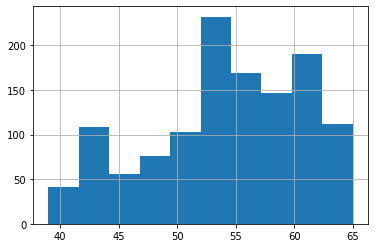

In [276]:
cardio_pressure['age'] = (cardio_pressure.loc[:,'age'] / 365).round()

cardio_pressure.age.hist()
print('Converting age in years')

In [294]:
print('Let\'s divide everyone into age groups and build distribution')
cardio_pressure['age_rank'] = np.digitize(cardio_pressure['age'], [40,45, 50, 55,60,65], right=True) + 1
cardio_pressure.age_rank.replace(to_replace= 1, value = '<40',inplace = True)
cardio_pressure.age_rank.replace(to_replace= 2, value = '41-45', inplace = True)
cardio_pressure.age_rank.replace(to_replace= 3, value = '46-50', inplace = True)
cardio_pressure.age_rank.replace(to_replace= 4, value = '51-55', inplace = True)
cardio_pressure.age_rank.replace(to_replace= 5, value = '56-60', inplace = True)
cardio_pressure.age_rank.replace(to_replace= 6, value = '61-65', inplace = True)
cardio_pressure.head()

Let's divide everyone into age groups and build distribution


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/gene/.local/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_rank
228,314,48.0,male,183,98.0,160,1100,1,2,1,0,1,1,29.263340,46-50
241,334,60.0,male,157,60.0,160,1000,2,1,0,0,0,1,24.341758,56-60
260,357,50.0,female,150,83.0,140,800,1,1,0,0,1,1,36.888889,46-50
329,458,64.0,female,176,63.0,160,1000,2,2,0,0,0,1,20.338326,61-65
345,482,51.0,female,154,81.0,140,1000,2,1,0,0,1,1,34.154158,51-55


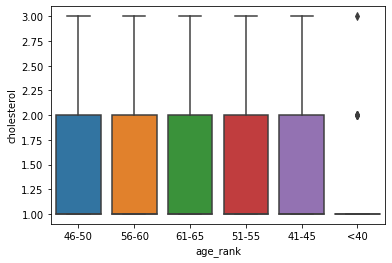

In [305]:
sns.boxplot(data=cardio_pressure, x='age_rank', y='cholesterol')

KeyError: False

KeyError: False